# Time Series Analysis

## What is a 'time-series'?
*A time series is a set of data observed (or measured) at regularly- or irregularly-spaced intervals of time*

* The independent dimension in general, could be something other than time (eg length, frequency, or any other quantity)
- Time-series are synonymous with sampled-data
* Observations could be a result of measurements using a physical sensor (eg temp, pressure, rainfall) or by calculations of some indices (eg stock market prices, grades)

---
*Time-series analysis consists of processing the observed data to extract meaningful and useful information. This information is used for various purposes such as forecasting, control, pattern recognition, fault detection, etc*

---

#### What constitutes a time series?
* A *time series* is a set of observations, each one recorded at a specific time (eg annual GDP of a country, sales figures)
- A *discrete time series* is one in which data is recorded only at specific time intervals belonging to a discrete set (the intervals need not be regularly spaced)
* A *continuous time series* is one in which observations are made continuously over a time period. It is a theoretical concept (an ECG graph comes close)
- A *discrete-valued* time series is one which takes discrete values (Nof accidents, Nof transactions)
* A *continuous-valued* time series is obtained when observations are in a real-valued interval
---
<p style='text-align:center;'>The Dow-Jones time series</p>
<img src='djts.png'>

---
<p style='text-align:center;'>A continuous-valued time series</p>

<img src='ecg.png'>

---
<p style='text-align:center;'>A discrete-valued time series</p>
<img src='disc.png'>

---
<p style='text-align:center;'>The sunspot time series (notice the cyclical nature)</p>
<img src='sun2.jpg'>

## Objective of Time Series Analysis
* Forecasting: knowing future is our innate wish
- Control: whether anything is going wrong, ECG, production processes, etc.
* Understanding features of the data: **seasonality**, **cycle**, **trend** and its **nature**. Degree of seasonality in agricultural price may indicate degree of development. Trend and cycle may mislead each other (Global temperature might be such a case)

## What does TSA involve?
The analysis of TS data involves one or more of the following tasks:
* **Trend analysis**: Does the observed data exhibit any particular trend such ss periodicity, seasonal variation, or any other pattern?
- **Correlation analysis**: Is there a dependence between successive observations of a quantity? Is there a relationship betweeen the evolution of one time-series and that of another time-series?
* **Spectral Analysis**: What frequency components make up the observed data? What are their relative strengths? Do these frequency components vary with time? 

**NOTE** While correlation analysis primarily involves processing in time-domain, spectral analysis involves processing in frequency-domain. There are two differnt domains that provide complementary information.

## Tasks in TSA
* **Time-Series Modelling**: Build models to predict the behaviour of random quantities. These models assume that a class of random signals can be modelled as fictitious random inputs passing through a linear time-invariant system.

- **Estimation**: What is the true signal underneath a measured quantity that is in general corrupted with noise? Consists of one or more of *smoothing*, *filtering* and *prediction*. Estimation is a very important task in data analysis

* **Data pre-processing**: Measured data can come with outliers and many a time, with missing observations as well. This step is concerned with detecting these outliers and suitably replacing the missing data. This step typically consumes large hours of data analysis.

- **Multivariate data analysis**: A very important area of data analysis where measurements from a multivariate system are analyzed

## Important aspects of TS modelling
* Time-series analysis is traditionally concerned with analysis of what are known as random signals
- Random signals are assumed to be generated by random processes
* A random process is essentially a process (or quantity) that evolves in time according to some probabilistic laws
- TS modelling is essentially concerned with prediction of these random signals from their observations
* The uniqueness of TS modelling is that no physical input(s) can be identified as responsible for the variation in the random signals. Rather, these variations are assumed to be due to the effect of some fictitious (random) inputs.
- In contrast, in modelling of engineering systems, there is always a set of input-output pairs whose relationship is sought (system-identification)

## Time Series Patterns
1. Horizontal Pattern

    * A horizontal pattern exists when the data fluctuates randomly around a constant mean over time
    - These data show the number of gallons of gasoline (in 1000s of gallons) sold by a gasoline distributor in Bennington, Vermont over the past 12 weeks.
    * The average value or mean for this time series is 19.25 or 19,250 gallons per week
    - Note how the data fluctuates around the sample mean of 19250 gallons
    * Although random variability is present, we would say that this data follows a horizontal pattern
---
<img src='gas.jpg'>

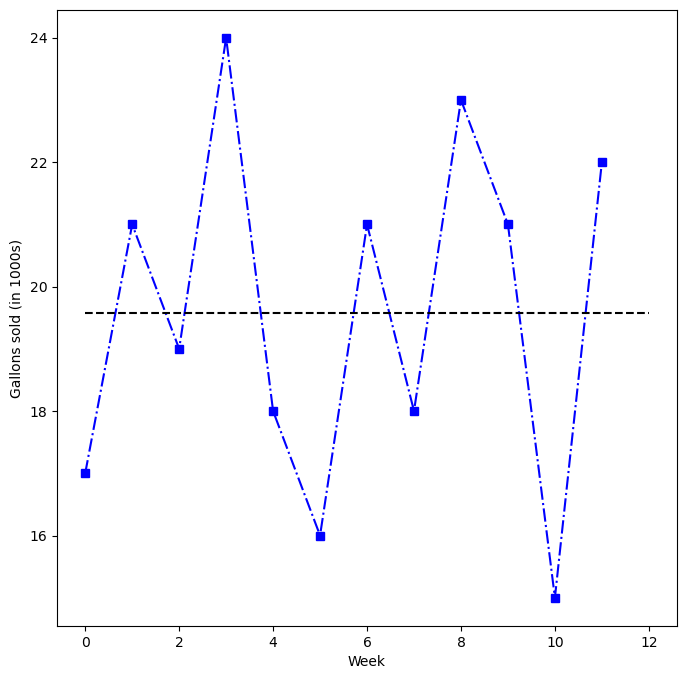

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#the data
gas = np.array([17,21,19,24,18,16,21,18,23,21,15,22])
gmean =np.mean(gas)

plt.subplots(figsize=(8,8))
plt.plot(gas,ls='-.',c='b',marker='s')
plt.plot([0,12],np.repeat(gmean,2),ls='--',c='k')
plt.xlabel('Week')
plt.ylabel('Gallons sold (in 1000s)')

plt.show()

2. Trend/Vertical pattern

    * TS data generally exhibits random fluctuations, a TS may also show gradual shifts or movements to relatively higher or lower values over a longer period of time
    - If a time series plot exhibits this type of behaviour, we say that there's a **trend** in the data.
    * A trend is usually the result of long-term factors such as:
        * Population increases or decreases
        * shifting demographic characteristics of the population
        * improving technology
        * changes in the competitive landscape, and/or changes in consumer preferences

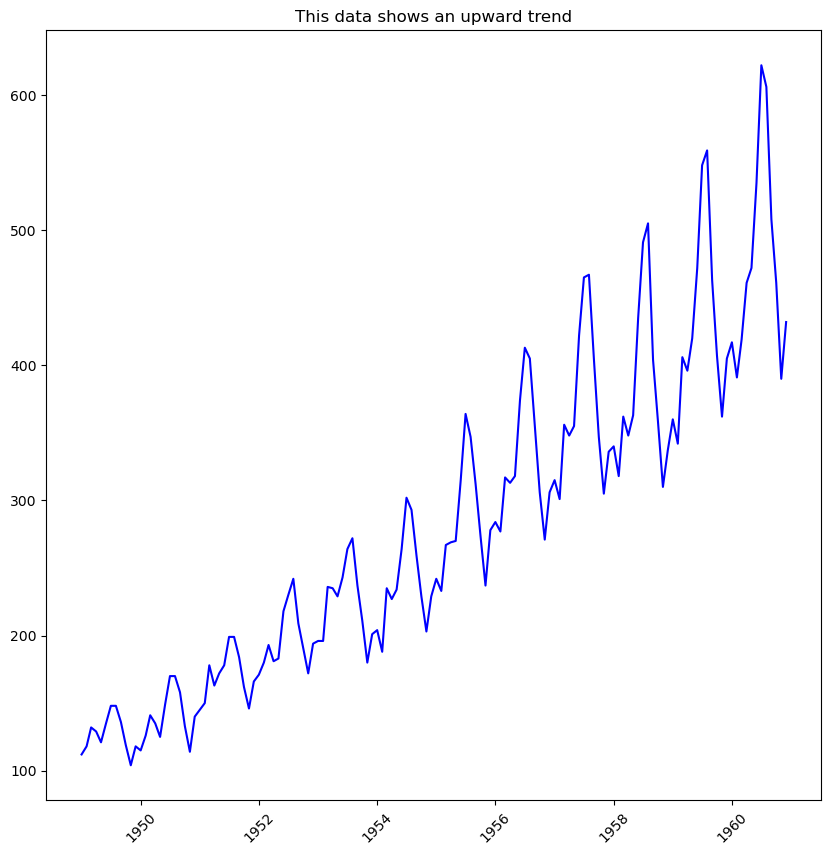

In [6]:
import pandas as pd

#get the data
ap = pd.read_csv('../../data/air_passengers.csv',usecols=[0,1],index_col=0,parse_dates=[0],date_format='%Y-%m')

#plotting the data
plt.subplots(figsize=(10,10))
plt.plot(ap.index,ap['Passengers'],ls='-',c='b')
plt.xticks(rotation=45)

plt.title('This data shows an upward trend')
plt.show()

3. Seasonal Pattern

    * The trend of a time series can be identified by analyzing movements in historical data over multiple time periods
    - **Seasonal patterns** are recognized by observing recurring patterns over successive periods of time.
    * For example:
        - A retailer who sells bathing suits expects low sales activity in the fall and winter months, with peak sales in the spring and summer months to occur every year
        - Retailers who sell snow removal equipment and heavy clothing, however, expect the opposite yearly pattern

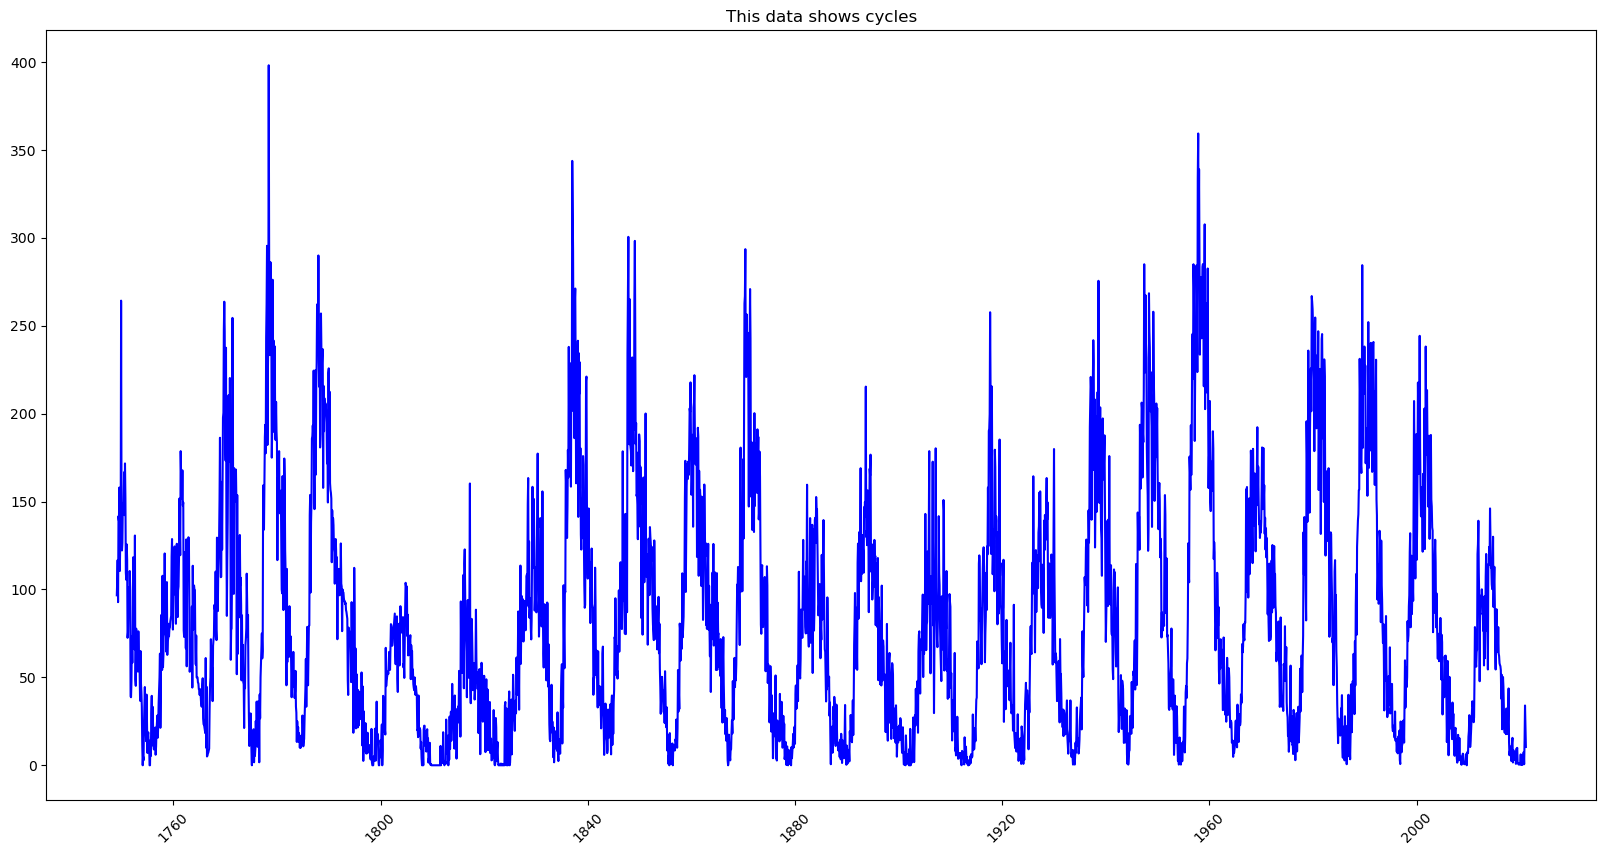

In [5]:
import pandas as pd

#get the data
ss = pd.read_csv('../../data/sunspot.csv',usecols=[1,2],index_col=0,parse_dates=[0],date_format='%Y-%m-%d')

#plotting the data
plt.subplots(figsize=(20,10))
plt.plot(ss.index,ss['Monthly Mean Total Sunspot Number'],ls='-',c='b')
plt.xticks(rotation=45)

plt.title('This data shows cycles')
plt.show()

4. Cyclic/Seasonal Pattern
* Long-term wave-like patterns
- Regularly occur but may vary in length
* Often measured peak-to-peak or trough-to-trough

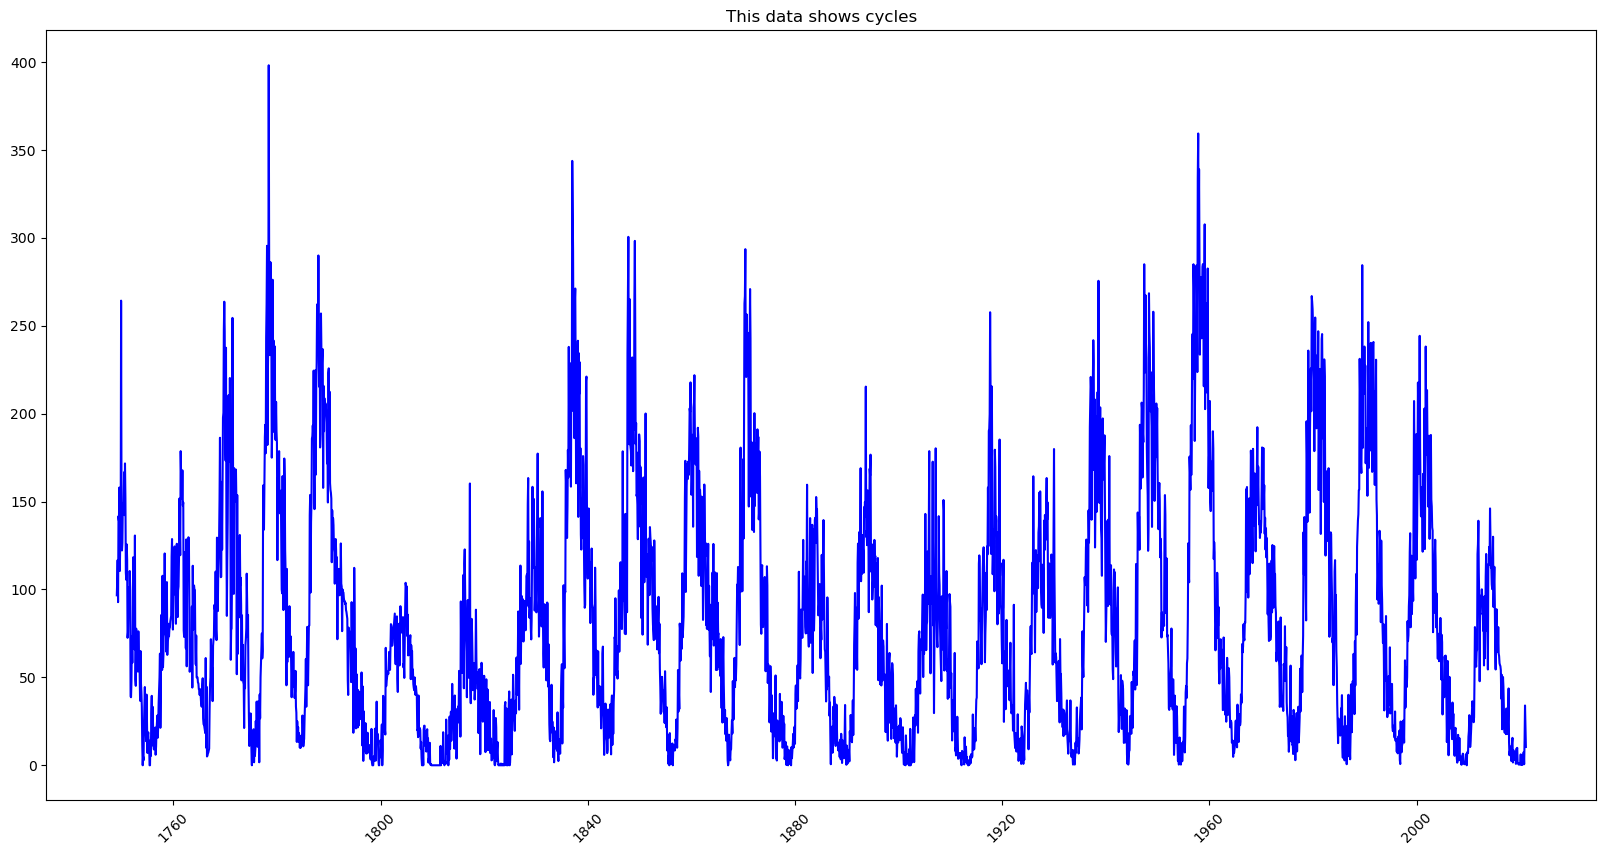

In [5]:
import pandas as pd

#get the data
ss = pd.read_csv('../../data/sunspot.csv',usecols=[1,2],index_col=0,parse_dates=[0],date_format='%Y-%m-%d')

#plotting the data
plt.subplots(figsize=(20,10))
plt.plot(ss.index,ss['Monthly Mean Total Sunspot Number'],ls='-',c='b')
plt.xticks(rotation=45)

plt.title('This data shows cycles')
plt.show()

## Stochastic processes Approach

- A time series is a realization or sample function from a certain stochastic process
* A time series is a set of observations generated sequentially in time. Therefore, they are dependent on each other. This means  that we do NOT have random sample
- We assume that observations are equally spaced in time
* We also assume that closer observations might have stronger dependency
---

* **DEFINITION** of a stochastic process
    - A stochastic process $\{y_t\}$, $t\in(-\infty,\infty)$ is a collection of random variables, or a process that develops in time according to probabilistic laws
* The theory of stochastic processes gives us a formal way to look at time series variables

---

<p style='text-align:center;'>$T\:(w,t)$</p> is a stochastic process

* where
    - $w$ belongs to the sample space, and $t$ is the index set
    - for a fixed $t$, $Y\:(w,\bar{t})$ is a random variable
    - for a given $w$, $Y\:(\bar{w},t)$ is called a sample function or a realization as a function of $t$

* **CHARACTERISTICS OF A SERIES**
- for a time series $\{Y_t\:,t=0,\pm 1,\pm 2,\dots\}$
    * THE MEAN FUNCTION<br><p style=text-align:center;>$\mu_t=E[Y_t]$</p>
        * $E[Y_t]$ is the expected value of the process at time $t$
        * This exists iff $E|Y_t|\leq\infty$
    - THE VARIANCE FUNCTION<br><p style=text-align:center;>$\sigma_t^2=\gamma_0=\text{Var}(Y_t)=E(Y_t-\mu_t)^2=E(Y_t^2)-\mu_t^2<\infty$</p>
        * $\gamma_0\geq 0$
        
    * THE AUTOCOVARIANCE FUNCTION<br><p style=text-align:center;>$\gamma_{t,s} = \text{Cov}(Y_t,Y_s)=E[(Y_t-\mu_t)(Y_s-\mu_s)]$</p>
        * $=E(Y_tY_s)-\mu_t\mu_s\:,t,s=0,\pm1,\pm2,\dots$
        * This is the covariance between the value at time $t$ and the value at time $s$ of a stochastic process $Y_t$
     
    - THE AUTOCORRELATION FUNCTION<br><p style=text-align:center;>$\rho_{t,s} = \text{Corr}(Y_t,Y_s)=\gamma_{t,s}/\sigma_t\sigma_s\:, -1\leq\rho_{t,s}\leq 1$</p>
        * This is the correlation of the series with itself
    
   

* **JOINT PDF OF A TIME SERIES**
- Remember that 
* $F_{X_1}(x_1)$ is the marginal CDF
- $f_{X_1}(x_1)$ is the marginal PDF
* $F_{X_1,X_2,\dots,X_n}(x_1,x_2,\dots,x_n)$ is the joint CDF
- $f_{X_1,X_2,\dots,X_n}(x_1,x_2,\dots,x_n)$ is the joint PDF

* For the observed time series, say we have two points, $t$ and $s$
    * The marginal PDFs would be $f_{Y_t}(y_t)$ and $f_{Y_s}(y_s)$ 
    * The joint PDFs: $f_{Y_t,Y_s}(y_t,y_s)\neq f_{Y_t}(y_t).f_{Y_s}(y_s)$ 
    
---
* Since we have only one observation for reach r.v. $Y_t$, inference is too complicated if distributions (or moments) change for all $t$ (i.e change over time). So, we need a simplification
- To be able to identify the structure of the series, we need the joint pdf of $Y_1,Y_2,\dots,Y_n$. 
* However, we have only one sample. That is, one observation from each random variable $\therefore$, it is very difficult to identify the joint distribution
* Hence we need an assumption to simplify our problem. this simplifying assumption is known as **STATIONARITY**

## Stationarity

* The most vital and common assumption in time series analysis
- The basic idea of stationarity is that the probability laws governing the process DO NOT change with time
* The process in in statistical equilibrium

---
### Types of stationarity

* **STRICT/STRONG/COMPLETE STATIONARY PROCESS**
    * Consider a finite set of r.v.s, $\{Y_{t_1},Y_{t_2},\dots,Y_{t_n}\}$ from a stochastic process,<br><p style=text-align:center;>$\{Y(w,t)\:,t=0,\pm 1,\pm 2, \dots\}$</p>
    
    - The $n$-dimensional distribution function is defined by:<br><p style=text-align:center;>$\{F_{Y_{t_1},Y_{t_2},\dots,Y_{t_n}}(y_{t_1},y_{t_2},\dots,y_{t_n})=P(w:Y_{t_1}\leq y_1,\dots,Y_{t_n}\leq y_n)$</p>
        * where $y_i\:,i=1,2,\dots,n$ are any real numbers

---
        
   * A process is said to be **FIRST ORDER STATIONARY** in distribution, if its one dimensional distribution function is time-invariant, i.e.
   <p style=text-align:center;>$F_{Y_{t_1}}(y_1) = F_{Y_{t_1+k}}(y_1)\:,\text{for any}\: t_1\:\text{and}\:k$</p>
   
   -  A process is said to be **SECOND ORDER STATIONARY** in distribution, if
   <p style=text-align:center;>$F_{Y_{t_1},Y_{t_2}}(y_1,y_2) = F_{Y_{t_1+k},Y_{t_2+k}}(y_1,y_2)\:,\text{for any}\: t_1,t_2 \:\text{and}\:k$</p>
   
* A process is said to be $N$-th **ORDER STATIONARY** in distribution, if 
<p style=text-align:center;>$F_{Y_{t_1}\dots Y_{t_n}}(y_1,\dots,y_n) = F_{Y_{t_1+k}\dots Y_{t_n+k}}(y_1,\dots,y_n)\:,\text{for any}\: t_1,\dots,t_n \:\text{and}\:k$</p>

- $N$-th Order stationarity in distribution equals strong stationarity
* shifting the time origin by an amount $k$, has no effect on the joint distribution, which must therefore depend only on time intervals between $t_1,t_2,\dots,t_n$, not on absolute time $t$

---
- So, for a **STRONG STATIONARY PROCESS**

* $f_{Y_{t_1}\dots Y_{t_n}}(y_1,\dots,y_n) = f_{Y_{t_1+k}\dots Y_{t_n+k}}(y_1,\dots,y_n)$


- $E[Y_t] = E[Y_{t+k}]\rightarrow \mu_t = \mu_{t+k} = \mu\:,\forall t,k$
    * The expected value of a series is constant over time, not a function of time


* $\text{Var}[Y_t] = \text{Var}[Y_{t+k}]\rightarrow \sigma_t^2 = \sigma_{t+k}= \sigma\:,\forall t,k$
    * The variance of a series is constant over time, *homoscedastic*
    
    
- $\text{Cov}[Y_t,Y_s] = \text{Cov}[Y_{t+k},Y_{s+k}]\rightarrow \gamma_{t,s} = \gamma_{t+k,s+k}\:,\forall t,k$
    * $\rightarrow \gamma_{|t-s|}=\gamma_{|t+k-s-k|}=\gamma_h$
    * Not constant, not dependent on time, depends on *time interval*, which we call **lag**, $k$
    
    
* $\text{Corr}[Y_t,Y_s] = \text{Corr}[Y_{t+k},Y_{s+k}]\rightarrow \rho_{t,s} = \rho_{t+k,s+k}\:,\forall t,k$
    * $\rightarrow \rho_{|t-s|}=\rho_{|t+k-s-k|}=\rho_h$
    * Let $t=t-k$ and $s=t$<p style=text-align:center;>$\rho_{t,t-k}=\rho_{t+k,t}=\rho_k\:,\forall t,k$</p>
   
    
    

## Weak Stationarity

* It is usually impossible to verify a distribution particualrly a joint distribution function from an observed time series. So, we use weaker sense of stationarity

- **WEAK STATIONARITY** or **STATIONARY IN A WIDE SENSE** (WSS)
    * A time series is said to be **covariance stationary** if its first and second order moments are unaffected by a change of time origin
    * That is, we have constant mean and variance with covariance and correlation being functions of time difference only
    
---
* So for a WEAK STATIONARY PROCESS

- $E[Y_t]=\mu\:,\forall t$

* $\text{Var}[Y_t] = \sigma^2\leq\infty\:,\forall t$

- $\text{Cov}[Y_t,Y_{t-k}]=\gamma_k\:,\forall t$

* $\text{Corr}[Y_t,Y_{t-k}]=\rho_k\:,\forall t$
---

* Mean:
    * The mean of a stationary process and its estimate are defined as:
    <p style=text-align:center;>$\mu_x = E[x_t]=\int_{-\infty}^{\infty}xf(x)dx\hspace{30pt}\bar{x} = \frac{1}{N}\Sigma_{k=1}^{N}x(t_k)$</p>
    
- Variance:
    * The variance of a stationary process and its estimate are defined as:
    <p style=text-align:center;>$\sigma_x^2=E[(x_t-\mu_x)^2]=\int_{-\infty}^{\infty}(x_t-\mu_x)^2f(x)dx\hspace{30pt}\hat{\sigma}_x^2=\frac{1}{N-1}\Sigma_{k=1}^{N}(x(t_k)-\bar{x})^2$